In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
train_data=pd.read_csv(r"/content/drive/MyDrive/Stroke Prediction Project/Stroke Prediction/train.csv")
test_data=pd.read_csv(r"/content/drive/MyDrive/Stroke Prediction Project/Stroke Prediction/test.csv")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#STUDYING DATASET
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [7]:
train_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [8]:
train_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [9]:
train_data.stroke.value_counts()

0    14672
1      632
Name: stroke, dtype: int64

In [10]:
train_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
train_data.isna()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,False,False,False,False,False,False,False,False,False,False,False,False
15300,False,False,False,False,False,False,False,False,False,False,False,False
15301,False,False,False,False,False,False,False,False,False,False,False,False
15302,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
train_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
train_data.isnull().sum().sum()

0

In [14]:
#DATA PREPROCESSING AND VISUALIZATION

In [15]:
train_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [16]:
print("Categorical Variables:")
cv=train_data.select_dtypes(include=['object']).columns
cv1=test_data.select_dtypes(include=['object']).columns
cv

Categorical Variables:


Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [17]:
cv1

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [18]:
print("Numerical Variables:")
nv=train_data._get_numeric_data().columns
nv

Numerical Variables:


Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [19]:
print(train_data['stroke'].value_counts())

0    14672
1      632
Name: stroke, dtype: int64


15304
15304


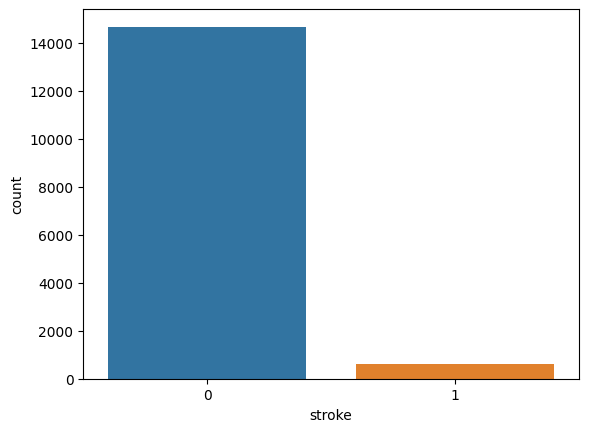

In [20]:
gf=sns.countplot(x=train_data['stroke'])
sum=len(train_data)
for p in gf.patches:
    print(sum)

In [21]:
print(train_data['gender'].unique())
print(train_data['ever_married'].unique())
print(train_data['work_type'].unique())
print(train_data['Residence_type'].unique())
print(train_data['smoking_status'].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['never smoked' 'formerly smoked' 'Unknown' 'smokes']


In [22]:
train_data['gender'].replace(['Male','Female','Other'],[0,1,2],inplace=True)
train_data['ever_married'].replace(['Yes','No'],[0,1],inplace=True)
train_data['work_type'].replace(['Private','Self-employed','Govt_job','children','Never_worked'],[0,1,2,3,4],inplace=True)
train_data['Residence_type'].replace(['Urban','Rural'],[0,1],inplace=True)
train_data['smoking_status'].replace(['never smoked','formerly smoked','Unknown','smokes'],[0,1,2,3],inplace=True)

In [23]:
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,28.0,0,0,0,0,0,79.53,31.1,0,0
1,1,0,33.0,0,0,0,0,1,78.44,23.9,1,0
2,2,1,42.0,0,0,0,0,1,103.00,40.3,2,0
3,3,0,56.0,0,0,0,0,0,64.87,28.8,0,0
4,4,1,24.0,0,0,1,0,1,73.36,28.8,0,0


In [24]:
test_data['gender'].replace(['Male','Female','Other'],[0,1,2],inplace=True)
test_data['ever_married'].replace(['Yes','No'],[0,1],inplace=True)
test_data['work_type'].replace(['Private','Self-employed','Govt_job','children','Never_worked'],[0,1,2,3,4],inplace=True)
test_data['Residence_type'].replace(['Urban','Rural'],[0,1],inplace=True)
test_data['smoking_status'].replace(['never smoked','formerly smoked','Unknown','smokes'],[0,1,2,3],inplace=True)

In [25]:
test_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,1,57.0,0,0,0,0,1,82.54,33.4,2
1,15305,0,70.0,1,0,0,0,0,72.06,28.5,2
2,15306,1,5.0,0,0,1,3,0,103.72,19.5,2
3,15307,1,56.0,0,0,0,2,0,69.24,41.4,3
4,15308,0,32.0,0,0,0,0,1,111.15,30.1,3


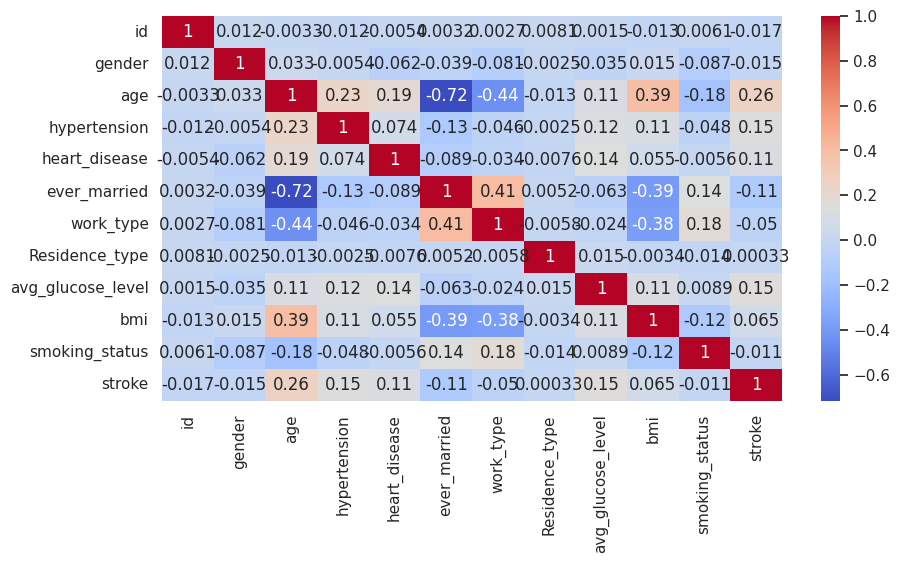

In [26]:
# Create the correlation matrix
corr_matrix = train_data.corr()

# Create the heatmap using Seaborn
sns.set(style='white')
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

y = train_data['stroke']
X = train_data.drop(columns=['stroke','id'], axis = 1)

# split into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12243, 10), (3061, 10), (12243,), (3061,))

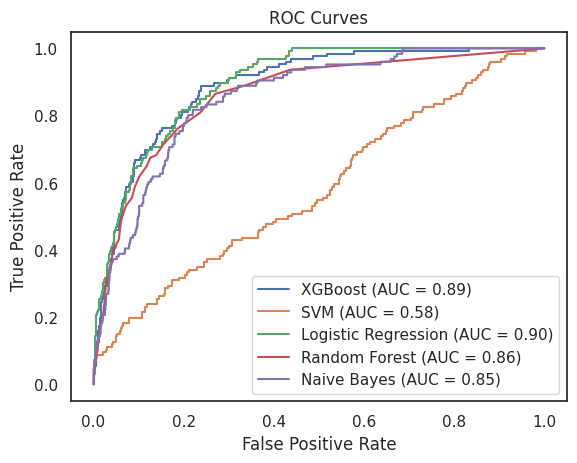

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Train XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Train SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

#Train Logistic Regression model
lr_model = LogisticRegression(random_state=42,max_iter=10000)
lr_model.fit(X_train, y_train)

#Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions for all models
y_pred_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_svm = svm_model.predict_proba(X_test)[:, 1]
y_pred_lr = lr_model.predict_proba(X_test)[:, 1]
y_pred_rf = rf_model.predict_proba(X_test)[:,1]
y_pred_nb = nb_model.predict_proba(X_test)[:,1]


# Calculate ROC curves for both models
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)

# Calculate AUC for both models
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_svm = auc(fpr_svm, tpr_svm)
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)
auc_nb = auc(fpr_nb, tpr_nb)

# Plot the ROC curves for all models in a single graph
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')

# Add a legend and axis labels
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.show()


In [29]:
test_id=test_data['id']
X1 = test_data.drop(columns=['id'], axis = 1)
y_pred_xgb = xgb_model.predict_proba(X1)[:,1]
for i in y_pred_xgb[:10]:
    print(np.around(i,decimals=2))

0.01
0.09
0.0
0.18
0.0
0.05
0.0
0.09
0.0
0.03


In [30]:
y_pred_lr = lr_model.predict_proba(X1)[:,1]
for i in y_pred_lr[:20]:
    print(np.around(i,decimals=2))

0.04
0.17
0.0
0.04
0.01
0.01
0.01
0.02
0.0
0.02
0.02
0.19
0.0
0.01
0.02
0.0
0.0
0.0
0.03
0.03


In [31]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [32]:
import gradio as gr
from gradio.components import *

In [33]:
train_data.index.name="index"
index = [x for x in range(0,15304)]
train_data.index=index
train_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,28.0,0,0,0,0,0,79.53,31.1,0,0
1,1,0,33.0,0,0,0,0,1,78.44,23.9,1,0
2,2,1,42.0,0,0,0,0,1,103.00,40.3,2,0
3,3,0,56.0,0,0,0,0,0,64.87,28.8,0,0
4,4,1,24.0,0,0,1,0,1,73.36,28.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,1,22.0,0,0,1,2,0,72.63,19.5,0,0
15300,15300,1,46.0,1,0,0,0,0,101.19,32.1,0,0
15301,15301,1,75.0,0,0,0,1,0,87.69,26.2,0,0
15302,15302,0,46.0,0,0,0,0,1,101.13,22.5,2,0


In [34]:
import pickle
pickle.dump(xgb_model,open('csv.xgb','wb'))
model = pickle.load(open('csv.xgb','rb'))

In [35]:
# def predict_stroke(id):
#     input_data=pd.DataFrame([[id]],columns=['id'])
#     xgb_pred = xgb_model.predict_proba(input_data)[:, 1][0]
#     return {'XGBoost': xgb_pred}
# input = gr.components.Number(label='Person id')
# output = gr.components.Number(label='Predicted Probability')
# gr.Interface( fn=predict_stroke,inputs=input,outputs=output).launch();
# Define function to make predictions
def make_prediction( gender, age, hypertension, heart_disease,ever_married, work_type, Residence_type,avg_glucose_level, bmi,
       smoking_status):
    # Create input dataframe
    input_df = pd.DataFrame([[gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type,avg_glucose_level, bmi,
   smoking_status]])# columns=[ 'gender','age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type','avg_glucose_level', 'bmi',
#        'smoking_status'])
    lr_pred = lr_model.predict_proba(input_df)[:, 1][0]
    return {'Stroke Probability': lr_pred}
# Define input components for Gradio interface
#id=gr.components.Number(label='id')
css_code='.gradio-container {background-image:url("https://media.istockphoto.com/id/1128931450/photo/heart-attack-concept.jpg?s=612x612&w=0&k=20&c=XHOhTXhpZMSV6XIhXLbH6uvNQjZQS93b1UetGfqQXtI=");height: 100%;background-position: center;background-repeat: no-repeat;background-size: cover;}'
gender=gr.components.Number(label='Gender')
age = gr.components.Number(label='Age')
hypertension = gr.components.Number(label='Hypertension')
heart_disease = gr.components.Number(label='Heart Disease')
ever_married=gr.components.Number(label='Ever_married')
work_type=gr.components.Number(label='Work_type')
Residence_type=gr.components.Number(label='Residence_type')
avg_glucose_level = gr.components.Number(label='Average Glucose Level')
bmi = gr.components.Slider(minimum=10.30,maximum=80.1,default=28.11,label='BMI')
smoking_status=gr.components.Number(label='Smoking_status')


# Create Gradio interface
gr.Interface(fn=make_prediction, inputs=[gender,age, hypertension, heart_disease,  ever_married, work_type, Residence_type,avg_glucose_level, bmi,
       smoking_status],
             outputs='label',
             title='Stroke Prediction',
             description='Predict the probability of stroke ', css=css_code).launch()

<ipython-input-35-b60ebb251262>:28: UserWarning: You have unused kwarg parameters in Slider, please remove them: {'default': 28.11}
  bmi = gr.components.Slider(minimum=10.30,maximum=80.1,default=28.11,label='BMI')


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>